In [1]:
!pip install --upgrade tomotopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.3 MB 5.4 MB/s 


In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.0 MB/s 
     |████████████████████████████████| 453 kB 53.1 MB/s 


In [3]:
import konlpy

In [4]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import tomotopy as tp

In [7]:
df = pd.read_csv("/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/최종제출데이터/크롤링데이터/장애인콜택시민원텍스트데이터.csv")
df

,title,link,content
0,77라7854정미양주임님을칭찬합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,오늘은 중화역3번출구에서 면목동집으로귀가할때 정미양주임님이 오래만에배차됐는데 사고예...
1,누가 무료로 택시 태워달라고 했나요?,https://www.sisul.or.kr/open_content/calltaxi/...,안녕하십니까?장애인의날 무료로 장애인들 택시 탑승시켜준다는 홍보가 아주 역겹습니다....
2,다시만나게된서울31사6200이관식기사님을칭찬합니다,https://www.sisul.or.kr/open_content/calltaxi/...,오늘중화2동주민센터에서퇴근할때서울31사6200이관식기사님이배차됐는데저를기억해주고 차...
3,서울32자4582최동원기사님을칭찬합니다. ♡♡♡♡♡,https://www.sisul.or.kr/open_content/calltaxi/...,오늘은최동원기사님을오래만에 배차됐는데 저를기억해주고 저한테잘해주고 승하차시 문개사고...
4,아이폰용 장애인콜택시 앱 대체 언제 업데이트 하나요?,https://www.sisul.or.kr/open_content/calltaxi/...,아이폰용 장애인콜택시 앱 실행 에러 문제로 작년 11월 29일과 올해 1월 5일 두...
...,...,...,...
525,장애인 콜택시 제작자로 등록을 하려고 합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,안녕하세요.저는 아산시에 위치한 새한에어서스펜션 주식회사의 이주환 이사 입니다.상기...
526,인터넷 접수 장애,https://www.sisul.or.kr/open_content/calltaxi/...,컴에서도 스마트폰에서도 접수 클릭하면 접수확인 창 뜨고 클릭하면 저수완료 대화창이 ...
527,장애인콜택시 기사님 교육좀 잘 좀 시키세요,https://www.sisul.or.kr/open_content/calltaxi/...,전 매일 아침 장애인콜택시를 이용해서 출근하는 중증의 장애인 입니다.매일아침 장애인...
528,불편사항에 관한 문의,https://www.sisul.or.kr/open_content/calltaxi/...,"이쪽에 문의 드려도 되는 것인지,사이트에서 확인 할 사항이 있어서 들어와 보았는대 ..."


In [8]:
df.isnull().sum()

title      0
link       0
content    0
dtype: int64

In [9]:
#데이터 프레임의 'text' 열의 값들을 str 형식으로 바꾸기
df['content'] = df['content'].astype(str) 

In [10]:
#한글이 아니면 빈 문자열로 바꾸기
df['content'] = df['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

In [11]:
df.isnull().sum()

title      0
link       0
content    0
dtype: int64

In [12]:
import re

In [13]:
def clean_text(text): 
  text = text.replace(".", " ").strip() 
  text = text.replace("·", " ").strip() 
  pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
  text = re.sub(pattern=pattern, repl='', string=text) 
  return text

In [14]:
from konlpy.tag import Mecab 
from tqdm import tqdm

In [15]:
Data_list = []
for i in range(len(df)):
  Data_list.append(clean_text(df['content'][i]))

In [16]:
from konlpy.tag import Okt

In [17]:
okt = Okt() # 객체 생성

In [18]:
len(Data_list)

530

In [19]:
for i, document in enumerate(Data_list):
    okt = konlpy.tag.Okt()
    clean_words = []
    for word in okt.pos(document, stem=True): #어간 추출
        if word[1] in ['Noun']: #명사
            clean_words.append(word[0])
    #print(clean_words) #['스토리', '진짜', '노잼']
    Data_list[i] = clean_words

In [20]:
len(Data_list)

530

In [21]:
for i in range(len(Data_list)):
  Data_list[i] = [e for e in Data_list[i] if len(e) >= 2] #1글자 단어들은 제거하기


In [22]:
x=[]
y=[]

for k in range(1, 30):
    model = tp.LDAModel(k=k, alpha=0.1, eta=0.01, min_cf=2, tw=tp.TermWeight.IDF)
    
    for line in Data_list:
        model.add_doc(line)
        
    for i in range(100):
        model.train(1)
        
    coh = tp.coherence.Coherence(model, coherence='c_v')
    coherence = coh.get_score()

    x.append(k)
    y.append(coherence)
    
    #for i in range(model.k):
    #   res = model.get_topic_words(i, top_n=5)
    #   print('Topic #{}'.format(i), end='\t')
    #   print(', '.join(w for w, p in res))

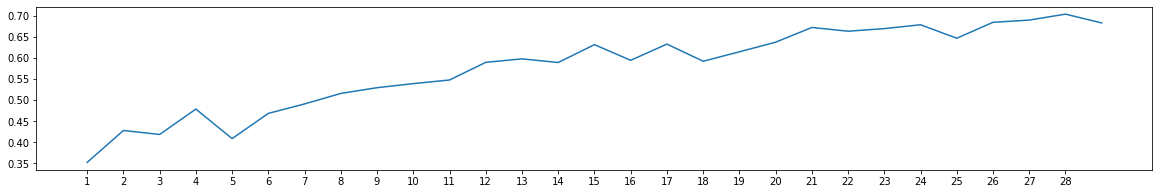

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(x, y)
plt.xticks(np.arange(1, 29))
plt.show()

In [24]:
for i in range(len(x)):
  print(x[i],y[i])

1 0.3520212750416249
2 0.42767994180321695
3 0.4182388467093309
4 0.47843971867114304
5 0.40844729691743853
6 0.4682352681489041
7 0.4906351167974728
8 0.5155317654833198
9 0.5291503610262276
10 0.5388095686584712
11 0.5473753775723955
12 0.5892468718190987
13 0.5974848211957858
14 0.5888385797185558
15 0.6312355974316596
16 0.5940802020952105
17 0.632498911066967
18 0.5918589607708984
19 0.6142413281296428
20 0.637027640948072
21 0.6719275605110895
22 0.6630654649301009
23 0.6692351603637572
24 0.6783715665340423
25 0.6464152882099152
26 0.6841926022217824
27 0.6894564976294834
28 0.7035632175526446
29 0.6826525566392931


일관성은 주제 내에서 단어 사이의 상대적 거리를 측정합니다. C_V에는 일반적으로 0 < x < 1 및 uMass -14 < x < 14의 두 가지 주요 유형이 있습니다. 측정되는 단어가 동일한 단어 또는 빅그램이 아닌 한 1 또는 +.9의 일관성을 보는 것은 드뭅니다. United States와 마찬가지로 United States는 ~.94의 일관성 점수를 반환하거나 Hero와 Hero는 1의 일관성을 반환할 것입니다. 주제의 전체 일관성 점수는 단어 사이의 거리의 평균입니다. 나는 c_v를 사용하고 있다면 내 LDA에서 .7을 얻으려고 노력합니다. 그것이 강력한 주제 상관 관계라고 생각합니다. 

.3 나쁘다

.4 낮다

.55 괜찮습니다

.65는 얻을 수 있는 만큼 좋을 수 있습니다.

.7 좋네요

.8 가능성이 낮고

.9는 아마도 틀릴 것이다

In [25]:
model = tp.LDAModel(k=15, alpha=0.1, eta=0.01, min_cf=5)
# LDAModel을 생성합니다.
# 토픽의 개수(k)는 15개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거할 겁니다.

In [26]:
for line in Data_list:
  model.add_doc(line)
  if i % 10 == 0: print('Document #{} has been loaded'.format(i))

In [27]:
# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고
# 학습 준비만 시킵니다.
# num_words, num_vocabs에 관심 없다면 이부분은 생략해도 됩니다.
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)

Total docs: 530
Total words: 27483
Vocab size: 1123


In [28]:
# 다음 구문은 train을 총 200회 반복하면서, 
# 매 단계별로 로그 가능도 값을 출력해줍니다.
# 혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
for i in range(200):
    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
    model.train(1)

Iteration 0	LL per word: -10.27891279496498
Iteration 1	LL per word: -8.948887526599687
Iteration 2	LL per word: -8.295788779665548
Iteration 3	LL per word: -7.894670464570435
Iteration 4	LL per word: -7.657595679747877
Iteration 5	LL per word: -7.475936064265187
Iteration 6	LL per word: -7.333844532669014
Iteration 7	LL per word: -7.222451854522271
Iteration 8	LL per word: -7.161058277080392
Iteration 9	LL per word: -7.112981781767423
Iteration 10	LL per word: -7.0326107655212455
Iteration 11	LL per word: -7.0309682488961975
Iteration 12	LL per word: -6.993502938219958
Iteration 13	LL per word: -6.944131468169811
Iteration 14	LL per word: -6.912421836983328
Iteration 15	LL per word: -6.874377288206502
Iteration 16	LL per word: -6.846675356046968
Iteration 17	LL per word: -6.824250353192483
Iteration 18	LL per word: -6.799627156855866
Iteration 19	LL per word: -6.773524805228401
Iteration 20	LL per word: -6.746278995445313
Iteration 21	LL per word: -6.742566598228148
Iteration 22	LL pe

In [29]:
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    res = model.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	차량, 운전, 출발, 운행, 이용자, 다른, 경우, 고정, 대한, 내용
Topic #1	접수, 민원, 직원, 운행, 자동, 반복, 전일, 이용자, 시간대, 정도
Topic #2	택시, 장애인, 이용, 경우, 때문, 위해, 이해, 대한, 상황, 개인
Topic #3	기사, 장콜, 정말, 저희, 상황, 설명, 짜증, 번호, 자주, 신고
Topic #4	장애인, 장애, 도움, 활동, 선생님, 보조, 좌석, 사용, 승차, 타고
Topic #5	전화, 문자, 상담, 신청, 안내, 답변, 어플, 통화, 문의, 장애인
Topic #6	이용, 답변, 고객, 지금, 왕복, 장콜, 혼자, 일이, 불만, 얼마
Topic #7	기사, 마음, 감사, 배려, 병원, 도착, 서울, 우리, 이동, 덕분
Topic #8	병원, 택시, 아이, 장애인, 저희, 이용, 치료, 휠체어, 이동, 재활
Topic #9	장애인, 택시, 이용, 서울시, 생각, 서울, 공단, 탑승, 손님, 시설
Topic #10	전화, 계속, 생각, 확인, 고객, 민원, 통화, 운전자, 본인, 문제
Topic #11	운전, 장콜, 무시, 사람, 장애인, 시설, 아들, 전원, 활동, 사고
Topic #12	배차, 운행, 칭찬, 안전, 항상, 오늘, 하루, 기분, 위해, 기사
Topic #13	기사, 휠체어, 오늘, 사람, 탑승, 교육, 타고, 기분, 운전, 다시
Topic #14	시간, 배차, 차량, 대기, 예약, 바로, 도착, 거리, 신청, 연결


In [30]:
from pandas import Series, DataFrame

In [31]:
# add_doc ...
doc_inst = model.make_doc(['대기'])
topic_dist, ll = model.infer(doc_inst)

print("Topic Distribution for Unseen Docs: ", topic_dist.tolist().index(sorted(topic_dist)[-1]))

Topic Distribution for Unseen Docs:  14


In [32]:
# pyLDAvis에 입력하여 시각화하기
topic_term_dists = np.stack([model.get_topic_word_dist(k) for k in range(model.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in model.docs])
doc_lengths = np.array([len(doc.words) for doc in model.docs])
vocab = list(model.used_vocabs)
term_frequency = model.used_vocab_freq

In [33]:
len(topic_term_dists)

15

In [34]:
len(doc_topic_dists)

530

In [35]:
len(doc_lengths)

530

In [36]:
len(vocab)

1123

In [37]:
len(term_frequency)

1123

In [ ]:
!pip install pyLDAvis

In [ ]:
import os 
os.environ["PYTHONIOENCODING"] ="utf-8"

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [41]:
prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency
)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [46]:
pyLDAvis.save_html(prepared_data, '/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/최종제출코드/LDA/ldavis_대기시간.html')

In [47]:
pyLDAvis.display(prepared_data)